# Лабораторная работа №1

In [25]:
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

In [26]:
A  = 2
T0 = -4
T1 = 4
SAMPLE_RATE = 1000
N  = 10

In [27]:
def rect_func(x: float, A: float):
    return A * np.sign(np.sin(np.pi * x))

In [28]:
def func_x(A: float, t0: float, t1: float, sample_rate: int):

    x = np.linspace(t0, t1, num = sample_rate, endpoint = False)
    y = np.apply_along_axis(lambda val: rect_func(val, A), 0, x)

    return x, y

In [29]:
def approx_func_x(N: int, T: float, x: float, y: float):
    
    w  = 2 * np.pi / T
    a0 = 2 / T * integrate.quad(lambda val: rect_func(val, A), 0, T)
    an = lambda n: 2 / T * integrate.quad(lambda val: rect_func(val, A) * np.cos(n * w * x), 0, T)
    bn = lambda n: 2 / T * integrate.quad(lambda val: rect_func(val, A) * np.sin(n * w * x), 0, T)

    sum = a0 / 2

    for t in x:
        for i in range(1, N):
            sum += an(i) * np.cos(i * w * t) + bn(i) * np.sin(i * w * t)


In [30]:
x0, y0 = func_x(A, T0, T1, SAMPLE_RATE)
x1, y1 = approx_func_x(N, x0, y0)

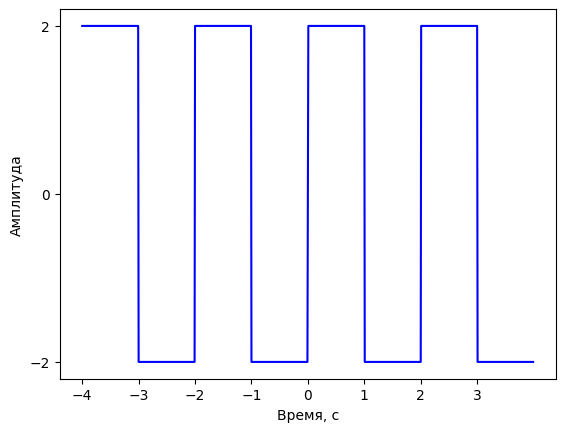

In [31]:
plt.plot(x0, y0, color = 'b')
plt.ylabel('Амплитуда')
plt.xlabel('Время, с')
plt.xticks(np.unique(np.int16(x0)))
plt.yticks([-A, 0, A])
plt.show()